In [1]:
%%capture
# Important header information
naluhelperdir = './'
import sys
# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patches as patches
%matplotlib inline

In [2]:
# DanAero Data
# See /ascldap/users/lcheung/GPFS1/2020/IEATask29/Field measurements Tjaereborg/Calibrated data/InflowLoadsAerodynamicsMeasurements_35Hz/PythonAnalysis/avgcolsWS.dat
# Run 16-07-2009/Tjaereborg_20090716_1250_000035.tim
DanAeroZ  = [17,        28.5,      41,        57,        77,        90]
DanAeroWS = [5.884,     5.973,     5.931,     6.128,     6.028,     6.088]

DanAeroZ2 = [17.574,    29.474,    41.739,    57.3,      77.254,    93.547]
DanAeroTI = [10.1274,   9.2976,    8.1857,    6.6971,    7.3315,    7.4028]

           #   WS,   TI,    alpha
TargetData = [[6.1, 0.068, 0.025]]

In [3]:
# Data from selection process
alldata="""
17880.0 18120.0 180  56   3 4336.9 1349.3   57.0 6.128006 0.066158 0.025166
19560.0 19800.0  72  84   3 1734.8 2023.9   57.0 6.134673 0.069249 0.025592
15000.0 15240.0  72  96   3 1734.8 2313.0   57.0 6.123323 0.068878 0.026254
16680.0 16920.0 136  96   3 3276.8 2313.0   57.0 6.145181 0.066684 0.025684
18120.0 18360.0  88  96   3 2120.3 2313.0   57.0 6.105696 0.068701 0.027014
15240.0 15480.0 140 108   3 3373.2 2602.2   57.0 6.107237 0.068151 0.025599
16440.0 16680.0  84 116   3 2023.9 2794.9   57.0 6.101912 0.066181 0.027327
18360.0 18600.0 140 120   3 3373.2 2891.3   57.0 6.114893 0.068995 0.024621
18360.0 18600.0 164 148   3 3951.4 3565.9   57.0 6.101714 0.066419 0.027295
18600.0 18840.0 188 156   3 4529.7 3758.7   57.0 6.112753 0.067700 0.025707
16920.0 17160.0 192 180   3 4626.1 4336.9   57.0 6.116706 0.066550 0.024478
17160.0 17400.0 148 180   3 3565.9 4336.9   57.0 6.120597 0.068142 0.027423
17400.0 17640.0 208 184   3 5011.6 4433.3   57.0 6.142230 0.066837 0.022616
15960.0 16200.0 184 188   3 4433.3 4529.7   57.0 6.116136 0.067661 0.024066
16680.0 16920.0  60 188   3 1445.6 4529.7   57.0 6.133780 0.068377 0.026110
"""
numdata=[x.split() for x in alldata.strip().splitlines()]
numdata=[[float(x) for x in y] for y in numdata]

In [4]:
filetemplate='timetrace_%i_%i_%i.dat'

In [5]:
profiledat=[]
for row in numdata:
    t1 = row[0]
    t2 = row[1]
    i  = int(row[2])
    j  = int(row[3])
    kvec = range(6)
    zvec = []
    uvec = []
    ustdvec = []
    for k in kvec: 
        file = filetemplate%(i,j,k) 
        dat  = np.loadtxt(file)
        t    = dat[:,0]
        filtert = ((t1<=t) & (t<=t2))
        filterdat = dat[filtert,:]
        avg     = np.mean(filterdat, axis=0)
        z       = avg[6]
        u       = avg[7]
        stdu    = np.std(filterdat[:,7])
        zvec.append(z)
        uvec.append(u)
        ustdvec.append(stdu)
    profiledat.append([zvec, uvec, ustdvec])
    print(zvec, uvec)

[17.0, 28.5, 41.0, 57.0, 77.0, 90.0] [5.800299488249521, 6.009479241114198, 6.087959975741815, 6.128006467973198, 6.17454589077893, 6.198017482501723]
[17.0, 28.5, 41.0, 57.0, 77.0, 90.0] [5.870173960162726, 6.021679449607904, 6.09415113410362, 6.13467324247807, 6.186565511629376, 6.1806552678441715]
[17.0, 28.5, 41.0, 57.0, 77.0, 90.0] [5.576107538543741, 5.848002669595684, 6.007192699725118, 6.123323460741393, 6.178018883709247, 6.231793699723168]
[17.0, 28.5, 41.0, 57.0, 77.0, 90.0] [5.789134186113112, 5.9882671650301855, 6.096825915124091, 6.145181038082997, 6.192366275585521, 6.215186121431779]
[17.0, 28.5, 41.0, 57.0, 77.0, 90.0] [5.539480105225718, 5.802108732815109, 5.969479402256747, 6.105696080578404, 6.1530668860236295, 6.095830046183502]
[17.0, 28.5, 41.0, 57.0, 77.0, 90.0] [5.96259564295628, 6.102812958782959, 6.106261851247094, 6.107236538128647, 6.152375188873061, 6.191500306230702]
[17.0, 28.5, 41.0, 57.0, 77.0, 90.0] [5.549895687037008, 5.823723136530896, 5.97837323433

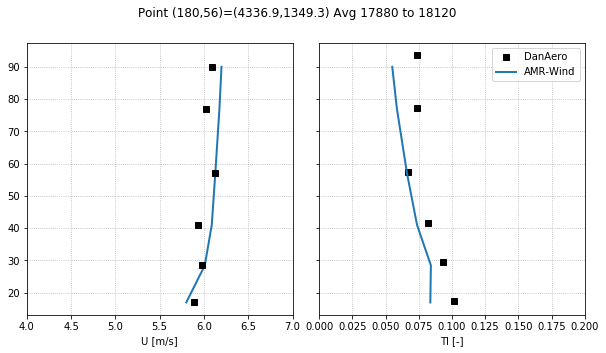

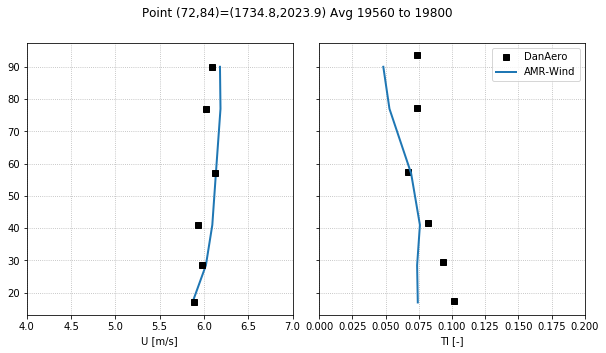

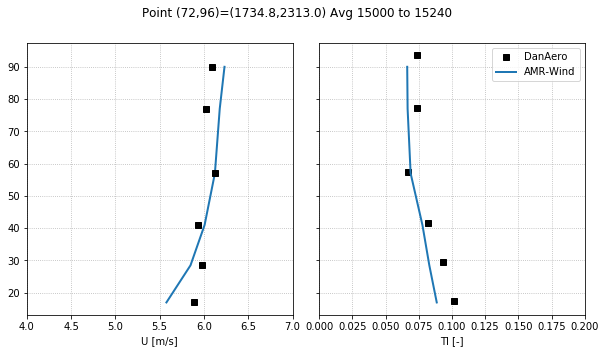

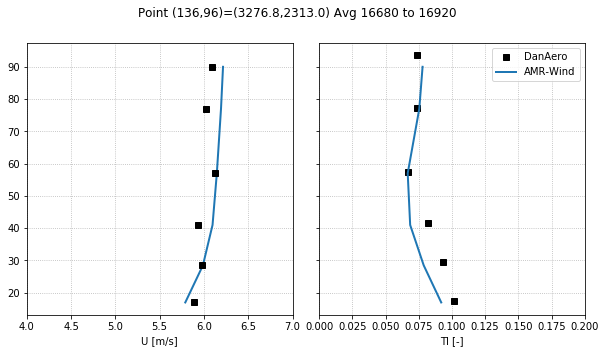

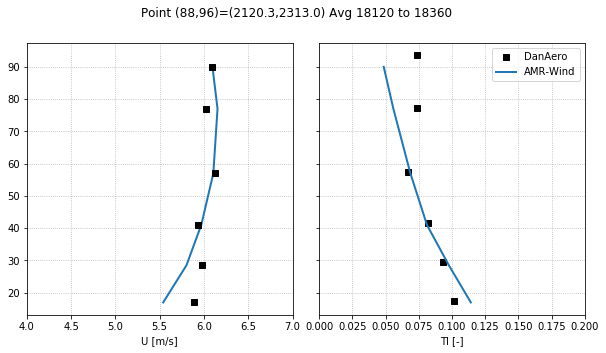

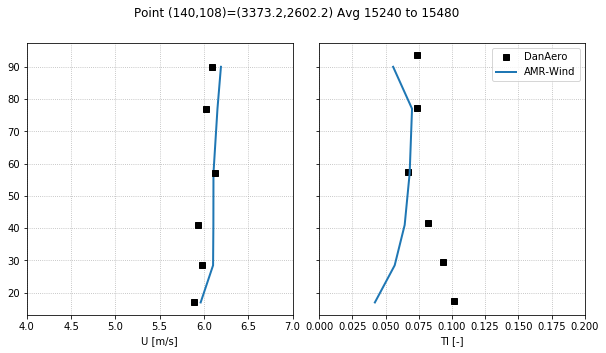

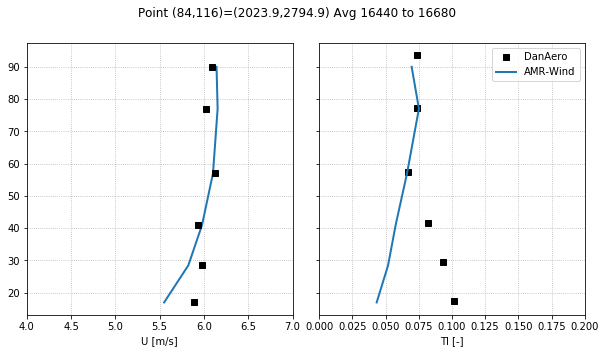

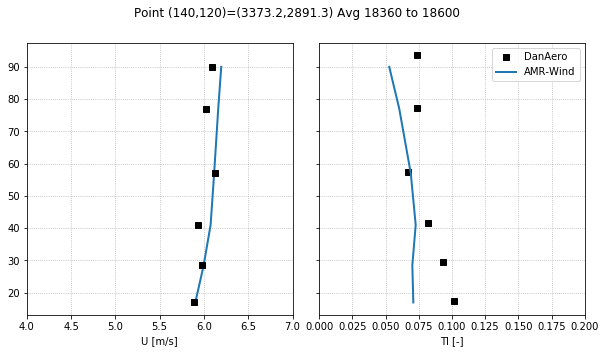

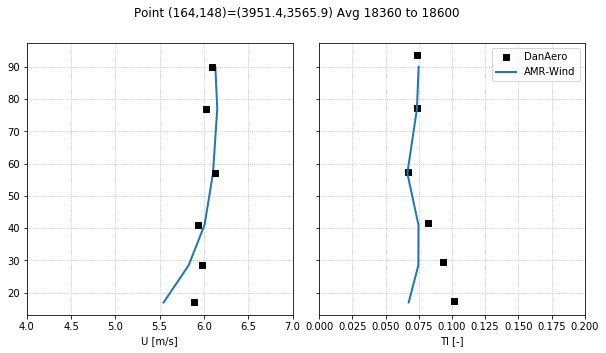

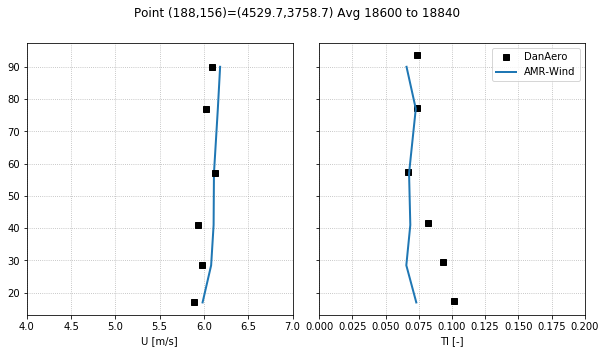

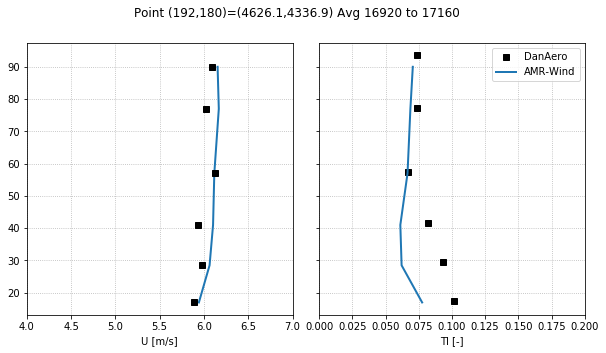

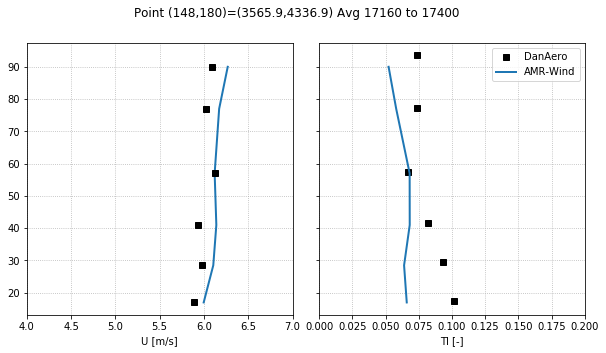

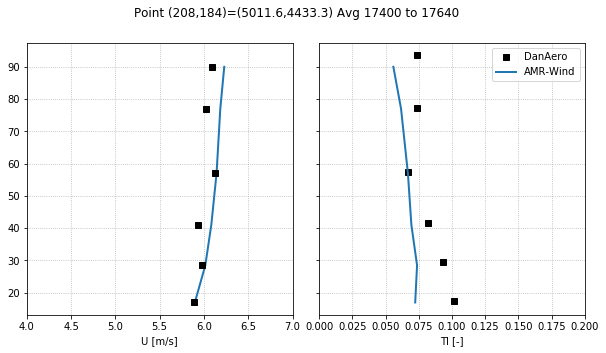

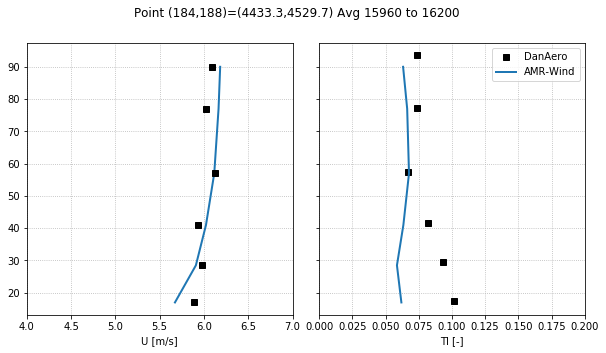

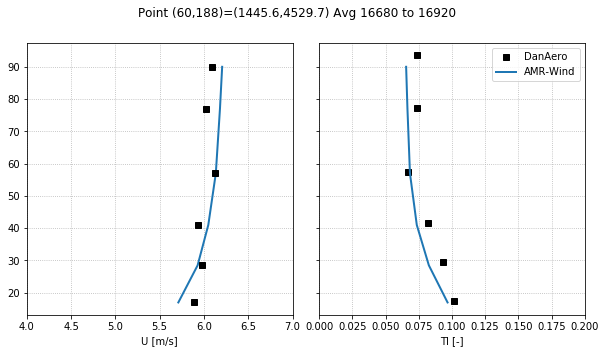

In [6]:
for iprof, prof in enumerate(profiledat):
    fig, axs = plt.subplots(1,2,figsize=(10,5),sharey=True)
    z    = prof[0]
    u    = np.array(prof[1])
    stdu = np.array(prof[2])
    axs[0].plot(u,z, linewidth=2)
    axs[0].plot(DanAeroWS, DanAeroZ, 's', color='k', label='DanAero')
    axs[0].set_xlim([4, 7])
    axs[0].set_xlabel('U [m/s]')
    axs[0].grid(linestyle=':')
    #axs[0].set_title('WS')
    
    
    axs[1].plot(np.array(DanAeroTI)/100, DanAeroZ2, 's', color='k', label='DanAero')
    axs[1].plot(stdu/u, z, linewidth=2, label='AMR-Wind')
    axs[1].set_xlim([0, 0.2])
    axs[1].set_xlabel('TI [-]')
    axs[1].grid(linestyle=':')
    axs[1].legend()
    #axs[1].set_title('TI')
    numrow = numdata[iprof]
    fig.suptitle('Point (%i,%i)=(%.1f,%.1f) Avg %.0f to %.0f'%(numrow[2], numrow[3], numrow[5],numrow[6], numrow[0], numrow[1]))
    plt.subplots_adjust(wspace=0.1)